# Project 2 (M9)
Qing Dou

## Introduction
In this project, I will embark on a comprehensive journey to explore and analyze movie-related data from three distinct sources, each with its unique perspective on the film industry. Our objective is to harness the power of Python programming, data parsing, web scraping, and API interactions to extract, process, and analyze data for insightful conclusions.


* Part 1: XML Parsing with Fandango: Parsing Fandango's XML sitemap to extract movie listings and organize them into a structured DataFrame for analysis.

* Part 2: API Interaction with Bechdel Test Database: Utilizing the Bechdel Test API to gather data on films and rating, compiling this information into an analyzable dataset.

* Part 3: Web Scraping Rotten Tomatoes: Extracting data about Golden Globe Best Film winners from Rotten Tomatoes through web scraping, to analyze trends in critically acclaimed movies.

* Part 4: Analyzing Dataset Connections: Investigating the relationship between gender representation in films from the Bechdel Test data (Part 2) and their critical acclaim as reflected in Rotten Tomatoes' Golden Globe winners data (Part 3).

github:https://github.com/qdou14/project2_movie_analysis



In [16]:
# We should setup for our data processing and analysis tasks, where we import essential Python libraries.
import requests 
import xml.etree.ElementTree as ET 
import pandas as pd 
import lxml
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns

## Part 1:XML Parsing


### Overview
In this section, we utilize a Python class named XMLName that interfaces with www.fandango.com to fetch the robots.txt, identify the sitemap, and parse the contents of each sitemap into a pandas DataFrame. This DataFrame will improve further analysis by providing site's URLs.

### Implementation

In [17]:
# Import the XMLName class from part_1 module within the src.my_package package
from src.movie_analysis.part_1_xml_parsing import XMLName

# Initialize the parser with the URL to Fandango's robots.txt
xmlname = XMLName("https://www.fandango.com/")

# Retrieve sitemap data and print the resulting DataFrame.
sitemap_data = xmlname.get_sitemap_data()
sitemap_data

,Sitemap_URLs
0,http://www.fandango.com/sitemapindex-movies.xml
1,http://www.fandango.com/sitemapindex-theaters.xml
2,http://www.fandango.com/sitemapindex-performer...
3,http://www.fandango.com/sitemapindex-videos.xml
4,http://www.fandango.com/image-sitemapindex-mov...
5,http://www.fandango.com/image-sitemapindex-per...
6,http://www.fandango.com/image-sitemapindex-pho...


### Sitmaps Analysis
The sitemap URLs extracted from robots.txt are listed in the DataFrame below. It have seven sitemap, each URL corresponds to a particular section of the Fandango website, such as movies, theaters, performers, videos, movies, performers and photogalleries. This structure suggests that Fandango organizes its content categorically, which could be useful for specific analyses, such as understanding the distribution of content across different entertainment sections.

### Potential Use Cases
With this dataset, we can perform various analyses, including but not limited to:

* Movie Trend Analysis: By examining the sitemapindex-movies.xml, we can track the latest movies being added to Fandango, providing insights into current trends in genres, release dates, and popular choices.

* Theater Distribution Mapping: With data from sitemapindex-theaters.xml, analysts could map out theater locations and correlate them with demographic data to understand regional movie preferences or market saturation.

* Performance Analysis: Using sitemapindex-performer.xml, we can study the popularity and marketability of movie stars or directors based on their presence on the platform.

* Image Data Mining: By scraping image-sitemapindex-movies.xml and image-sitemapindex-performers.xml, one could use image recognition techniques to analyze movie posters or celebrity images for patterns in visual marketing.

# Part 2: Using an API

### Overview
This section uses the Bechdel Test API to retrieve movie data based on their representation of women. This data includes movie titles, years of release, Bechdel ratings, and more.

### Data Retrieval
The `APIClient` class is equipped with methods that correspond to the API's endpoints, allowing us to query the API based on IMDb ID or movie title, fetch all movie IDs and years.

In [18]:
from src.movie_analysis.part_2_api import APIClient

# Instantiate the API client
api_client = APIClient(base_url="http://bechdeltest.com/api/v1")

# Get all movies using the API client
df_all_movies = api_client.get_all_movies()

# Display the first few rows of the DataFrame
df_all_movies.head()

,rating,id,year,title,imdbid
0,0,9602,1874,Passage de Venus,3155794
1,0,9804,1877,La Rosace Magique,14495706
2,0,9603,1878,Sallie Gardner at a Gallop,2221420
3,0,9806,1878,Le singe musicien,12592084
4,0,9816,1881,Athlete Swinging a Pick,7816420


#### The DataFrame contains five key variables:

- rating: This represents the Bechdel Score, ranging from 0 to 3. A score below 3 indicates that the movie did not pass the Bechdel Test, while a score of 3 signifies that it did pass.
- imdbid: The unique identifier for each movie in the IMDB database.
- title: The title of the movie.
- id: A unique identifier for each movie within this dataset.
- year: The release year of the movie.
Upon examining the year column, it's evident that the dataset includes movies from as early as the 19th century. Many of these early films have a Bechdel score of 0. For more focused analysis, I will create a new DataFrame that includes only movies released after 1967. This refined dataset will be used for subsequent analyses.

The next code retrieves movie data for the title "Matrix" from an online API, using the APIClient class from our custom package. It demonstrates a method for obtaining supplemental data,  while not critical for our immediate analysis, can be useful for enriching our dataset. The head() function is used to preview the first few entries of the retrieved data, allowing for a quick inspection of the results.

In [19]:
df_movies_by_title = api_client.get_movies_by_title("matrix")
# Display the first few rows of the DataFrame to inspect the data
df_movies_by_title.head()


,imdbid,id,title,year,visible,rating,submitterid,dubious,date
0,10838180,10167,"Matrix Resurrections, The",2021,1,3,19776,0,2021-12-25 05:10:39
1,0234215,58,"Matrix Reloaded, The",2003,1,2,1,0,2008-07-21 00:00:00
2,0242653,59,"Matrix Revolutions, The",2003,1,3,1,0,2008-07-21 00:00:00
3,0303678,4429,Armitage: Dual Matrix,2002,1,1,7916,1,2013-08-01 15:26:03
4,0133093,36,"Matrix, The",1999,1,3,1,0,2008-07-20 00:00:00


This dataset lists movies related to the search term "Matrix" with their corresponding Bechdel scores, ranging from 0 to 3. It includes columns for each movie's IMDB ID, release year, and a flag indicating the reliability of the Bechdel test result.

In [20]:
# Retrieve movie data by IMDB ID
imdb_id = "0133093"  # Example IMDB ID for "The Matrix"
df_movie_by_imdb = api_client.get_movie_by_imdb_id(imdb_id)
# Display the data for the single movie
df_movie_by_imdb.head()

,dubious,visible,submitterid,rating,id,year,imdbid,date,title
0,0,1,1,3,36,1999,0133093,2008-07-20 00:00:00,"Matrix, The"


This dataset provides information for a single movie identified by the IMDB ID "0133093", known as "The Matrix". It details the movie's Bechdel score, release year, and a flag for any doubts regarding the Bechdel test outcome.

### Analysis Possibilities
With this data, we can analyze trends in film with respect to gender representation, such as:
- The proportion of movies passing the Bechdel Test over the years.
- Correlations between Bechdel scores and other movie attributes like genre or box office performance.
* How many movies pass the Bechdel Test each year?
* Is there a correlation between the Bechdel Test score and the movie's popularity or critical acclaim?
* Analysis of genre-wise distribution of Bechdel Test scores.

# Part 3: Web Scraping

### Overview
This notebook demonstrates how to scrape data from Rotten Tomatoes, specifically the Golden Globe Best Film winners and their Tomatometer scores.


### Methodology
The `GoldenGlobesScraper` class is designed to:
- Send an HTTP request to the provided Rotten Tomatoes URL.
- Parse the HTML content using BeautifulSoup to extract movie titles and Tomatometer scores.
- Store the extracted data in a list of dictionaries, which can be easily converted into a pandas DataFrame.

In [21]:
# Import the scraper class from our custom package for web scraping tasks.
from src.movie_analysis.part_3_web_scraping import RottenTomatoesScraper

# Define the URL for the Rotten Tomatoes Golden Globes Best Film winners list.
base_site1 = "https://editorial.rottentomatoes.com/guide/golden-globes-best-film-winners-by-tomatometer/"

# Initialize the web scraper with the specified URL.
scraper = RottenTomatoesScraper(base_site1)

# Use the scraper to collect movie data into a pandas DataFrame.
movies_df = scraper.scrape_movies()

# Display the first five rows of the scraped movie data for verification.
movies_df.head()

200


,title,year,score,url
0,Toy Story 2,1999,100%,https://www.rottentomatoes.com/m/toy_story_2
1,The Treasure of the Sierra Madre,1948,100%,https://www.rottentomatoes.com/m/treasure_of_t...
2,Lady Bird,2017,99%,https://www.rottentomatoes.com/m/lady_bird
3,E.T. the Extra-Terrestrial,1982,99%,https://www.rottentomatoes.com/m/et_the_extrat...
4,On the Waterfront,1954,99%,https://www.rottentomatoes.com/m/on_the_waterf...


### Dataset Description
The resulting dataset includes the following fields:

- title: The name of the movie.
- year: The release year of the movie.
- score: The Tomatometer score given to the movie on Rotten Tomatoes, which is a percentage representing the proportion of positive reviews.
- url: The specific URL to the Rotten Tomatoes page for the movie.

### Potential Analysis
With this dataset, we can explore questions such as:
- How have Tomatometer scores of Golden Globe-winning films trended over time?
- Is there a correlation between Tomatometer scores and other awards, like the Oscars?
- Do higher Tomatometer scores correlate with box office success for these award-winning films?

## Part 4: Analyze dataset

Most movies after the year 1967 seem to have higher Bechdel scores, but do they pass the Bechdel test?

In [22]:
# Process the movies DataFrame
df_processed = api_client.process_movies(df_all_movies)
df_processed.head()

d:\python project\movie_analysis\src\movie_analysis\part_2_API.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new = df_new.assign(Bechdel_Score=lambda x: x['Bechdel Score'].astype('category'))


,Bechdel Score,id,year,title,imdbid
1368,0,323,1968-01-01,Taiyo no oji: Horusu no daiboken,0063668
1369,1,599,1968-01-01,Planet of the Apes,0063442
1370,2,764,1968-01-01,Charly,0062794
1371,0,844,1968-01-01,"Producers, The",0063462
1372,3,857,1968-01-01,Rosemary&#39;s Baby,0063522


Now, there is a dataframe called pass test, with a value of 1 for all the movies that pass the Bechdel test, and a value of 0 for the movies that don’t.

In [23]:
df_processed = api_client.add_pass_test_column(df_processed)

d:\python project\movie_analysis\src\movie_analysis\part_2_API.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pass_test'] = df['Bechdel Score'].apply(lambda score: 1 if score >= 3 else 0)


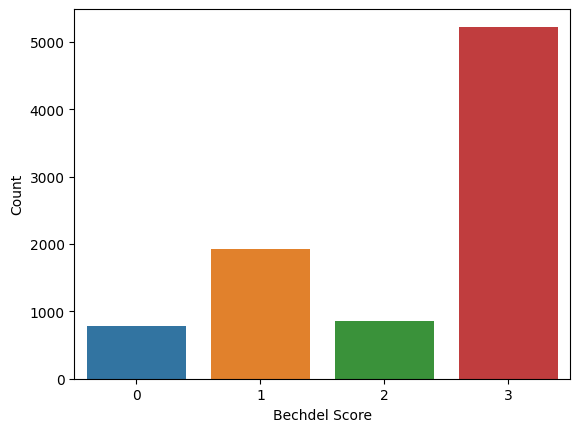

In [24]:
# Plot the Bechdel Score distribution
fig_bechdel_score = api_client.plot_bechdel_score(df_processed)
plt.show(fig_bechdel_score)  # This will display the figure in the notebook

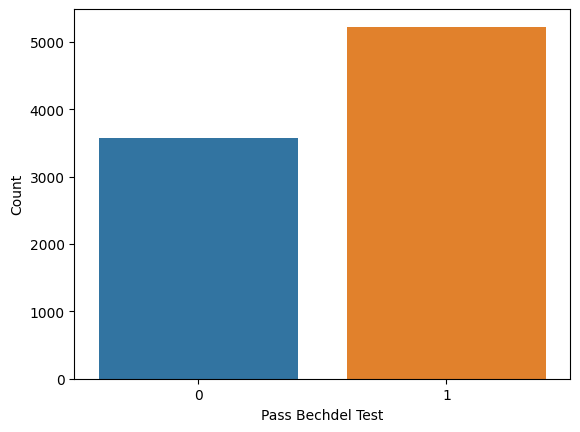

In [25]:
# Plot the pass test distribution
fig_pass_test = api_client.plot_pass_test(df_processed)
plt.show(fig_pass_test)  # This will display the figure in the notebook

There are more movies that have passed the Bechdel test as opposed to the ones that haven’t, since the year 1967.

However, this difference is not as significant as I expected it to be. There still seems to be a very large number of movies that didn’t pass the test.

#### Part_3 analysis

200


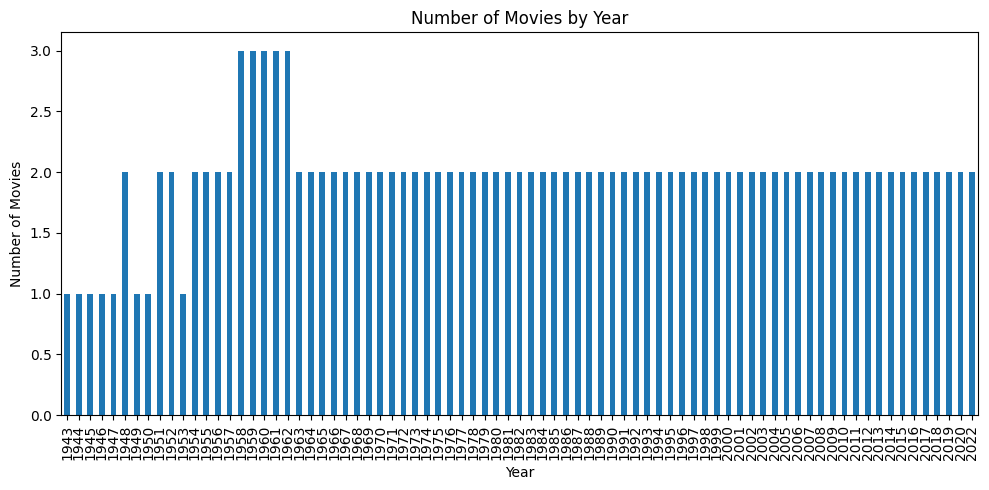

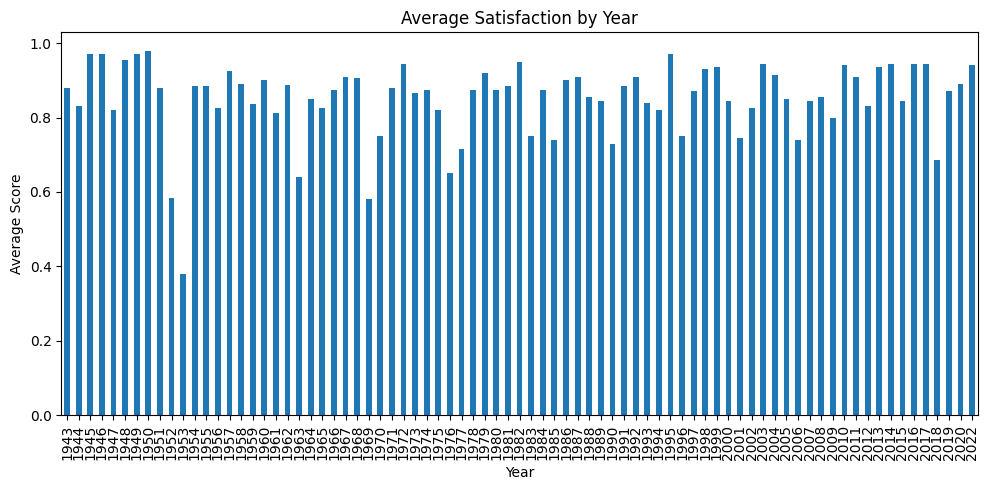

In [26]:
from src.movie_analysis.part_3_web_scraping import RottenTomatoesScraper
scraper = RottenTomatoesScraper("https://editorial.rottentomatoes.com/guide/golden-globes-best-film-winners-by-tomatometer/")
movies_df = scraper.scrape_movies()

# Prepare the data by converting 'year' to integer and 'score' to a float
prepared_df = scraper.prepare_data(movies_df)

# Plot the number of movies by year
scraper.plot_number_of_movies_by_year(prepared_df)

# Plot the average score by year
scraper.plot_average_score_by_year(prepared_df)

This use of RottenTomatoesScraper class is to scrape movie data from the Rotten Tomatoes website, process the data, and plot visualizations. Specifically, the scraper is used to extract movie information from a given URL, convert the 'year' column to integers and the 'score' column to floats, and then create two bar charts: one showing the number of movies by year, and another showing the average score by year. The visualizations provide insights into the distribution and average Rotten Tomatoes scores of movies over the years.

# References

Alex Vo. Golden Globes Best Film Winners by Tomatometer. Retrieved from https://editorial.rottentomatoes.com/guide/golden-globes-best-film-winners-by-tomatometer/

Chocolate, T. (2013, June 6). Visualizing the Bechdel Test. Retrieved from https://tenchocolatesundaes.blogspot.com/2013/06/visualizing-bechdel-test.html